In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plot

In [ ]:
import ipywidgets as widgets
from IPython.display import display
import os

box_layout = widgets.Layout(
    display="flex",
    flex_flow="column",
    align_items="center",
    border="1px solid #E0E0E0",
    width="400px",
    padding="25px",
    border_radius="10px"
)

button_layout = widgets.Layout(width="100%", height="40px")

upload_layout = widgets.Layout(width="100%")

title = widgets.HTML(
    "<h3 style='margin-bottom:10px;'>Upload CSV Files 👇</h3>"
)

subtitle = widgets.HTML(
    "<p style='color:gray; margin-top:0;'>Select one or more CSV files to upload and save</p>"
)

train_uploader = widgets.FileUpload(
    accept='.csv',
    multiple=True,
    layout=upload_layout
)

save_button = widgets.Button(
    description='Save Files',
    button_style='primary',
    icon='save',
    layout=button_layout
)

status = widgets.HTML("<p style='color:gray;'>Waiting for upload...</p>")

output = widgets.Output()

def save_files(change=None):
    with output:
        output.clear_output()
        
        if train_uploader.value:
            saved_files = []
            for filename, file_info in train_uploader.value.items():
                with open(filename, "wb") as f:
                    f.write(file_info['content'])
                saved_files.append(filename)
            
            status.value = f"<p style='color:green;'>Saved {len(saved_files)} file(s) 👍</p>"
        else:
            status.value = "<p style='color:red;'>⚠️ No files uploaded yet</p>"

train_uploader.observe(save_files, names='value')

save_button.on_click(save_files)

card = widgets.VBox(
    [title, subtitle, train_uploader, save_button, status],
    layout=box_layout
)

display(card)
display(output)

Output()

In [3]:
df = pd.read_csv('file.csv')

In [4]:
df.sample(5)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
13440,30084,city_80,0.847,Other,No relevent experience,no_enrollment,Graduate,STEM,0.0,<10,Pvt Ltd,40.0,1.0
6799,64,city_114,0.926,Male,Has relevent experience,no_enrollment,Masters,STEM,20.0,50-99,Pvt Ltd,188.0,0.0
284,9571,city_173,0.878,Male,No relevent experience,Part time course,Graduate,STEM,10.0,10/49,Early Stage Startup,NaN,0.0
5837,26881,city_57,0.866,Male,No relevent experience,no_enrollment,High School,NaN,4.0,NaN,NaN,66.0,0.0
5253,17768,city_144,0.840,Male,Has relevent experience,no_enrollment,Graduate,STEM,3.0,50-99,Pvt Ltd,41.0,1.0


In [5]:
df.isnull().mean()*100

,0
enrollee_id,0.000000
city,0.000000
city_development_index,2.500261
gender,23.530640
relevent_experience,0.000000
enrolled_university,2.014824
education_level,2.401086
major_discipline,14.683161
experience,0.339284
company_size,30.994885


#### **Note**
We apply CCA on those columns where missing data is less than 5%

In [6]:
cols = [c for c in df.columns if df[c].isnull().mean() < 0.05 and df[c].isnull().mean() > 0]

cols

['city_development_index',
 'enrolled_university',
 'education_level',
 'experience',
 'training_hours']

In [7]:
df[cols].sample(5)

,city_development_index,enrolled_university,education_level,experience,training_hours
13581,0.920,no_enrollment,Graduate,16.0,64.0
6852,0.727,no_enrollment,Graduate,17.0,124.0
2892,0.926,Full time course,Masters,13.0,90.0
10200,0.920,Part time course,NaN,6.0,98.0
11802,0.855,no_enrollment,Masters,15.0,23.0


In [10]:
new_df = df[cols].dropna()

In [11]:
new_df.sample(4)

,city_development_index,enrolled_university,education_level,experience,training_hours
6728,0.740,no_enrollment,Graduate,8.0,170.0
11417,0.893,no_enrollment,Graduate,12.0,33.0
14579,0.624,Full time course,Graduate,3.0,26.0
15983,0.920,no_enrollment,Graduate,9.0,44.0


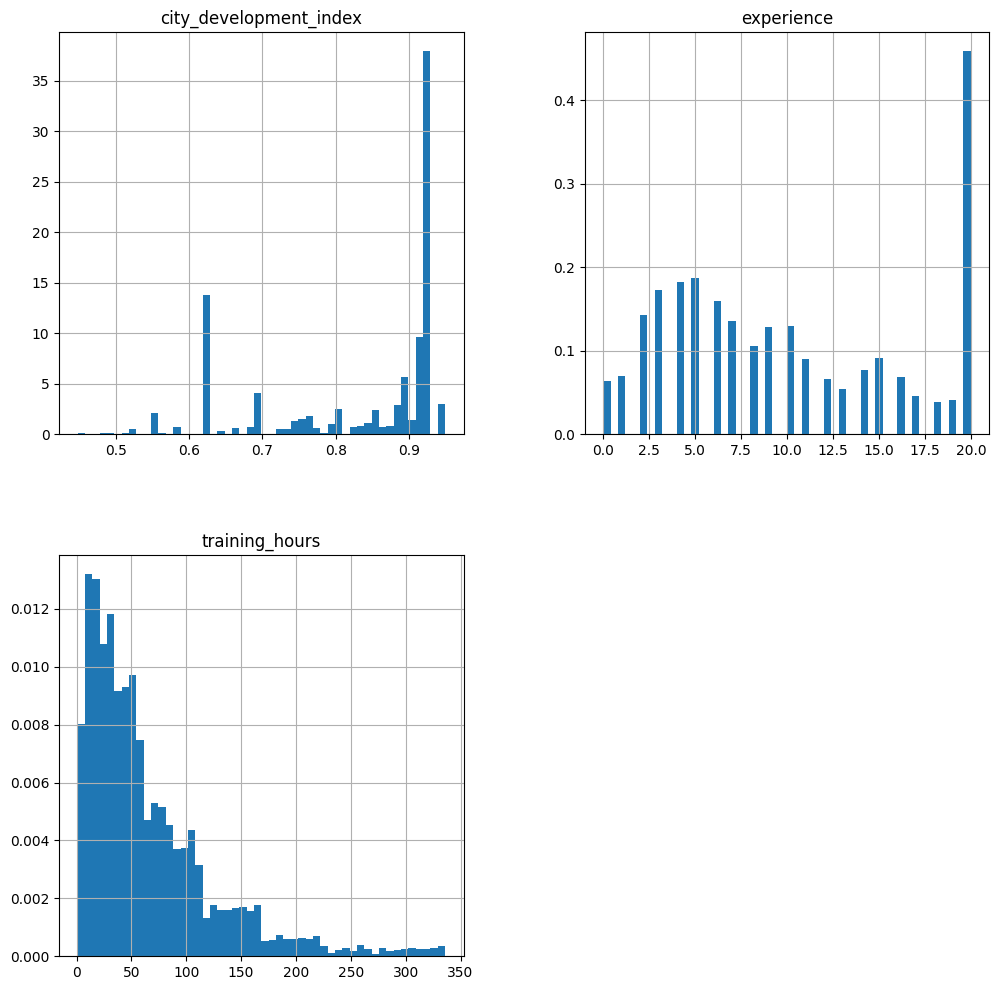

In [27]:
new_df.hist(bins=50, density=True, figsize=(12, 12))
plot.show()


<Axes: ylabel='Density'>

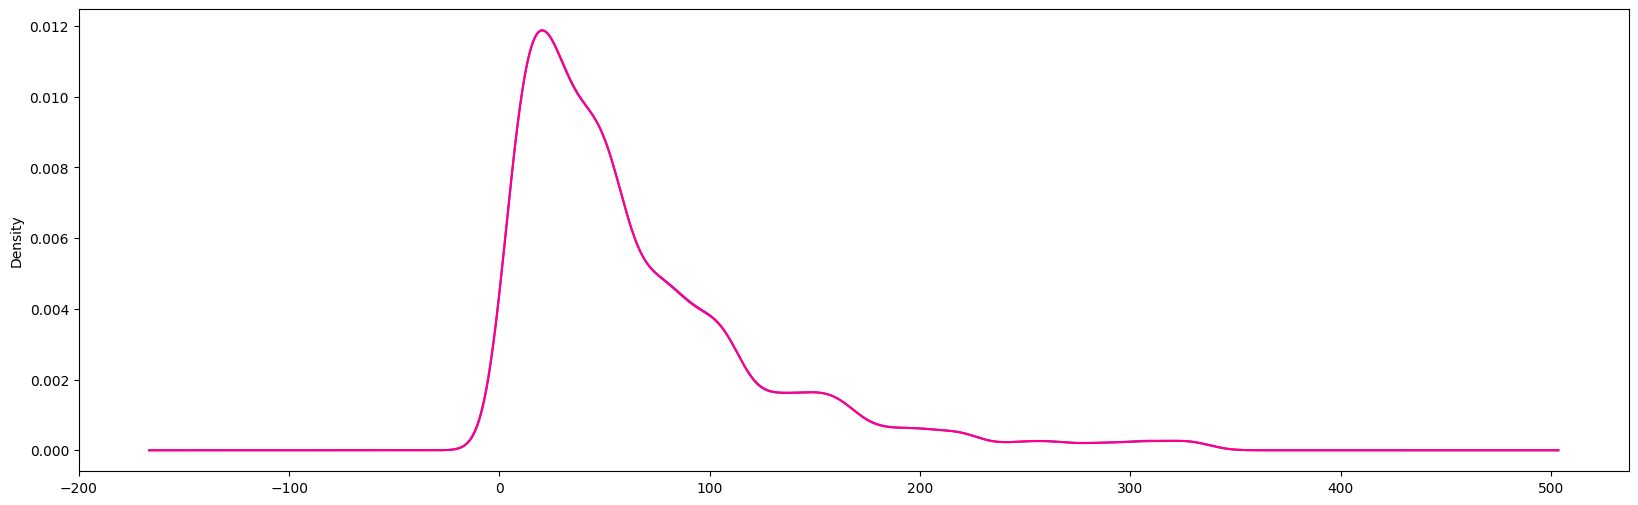

In [38]:
fig = plot.figure(figsize=(20,6))
ax = fig.add_subplot(111)

df['training_hours'].plot.density(color="#8a1dff")
new_df['training_hours'].plot.density(color="#ff0080")

<Axes: ylabel='Density'>

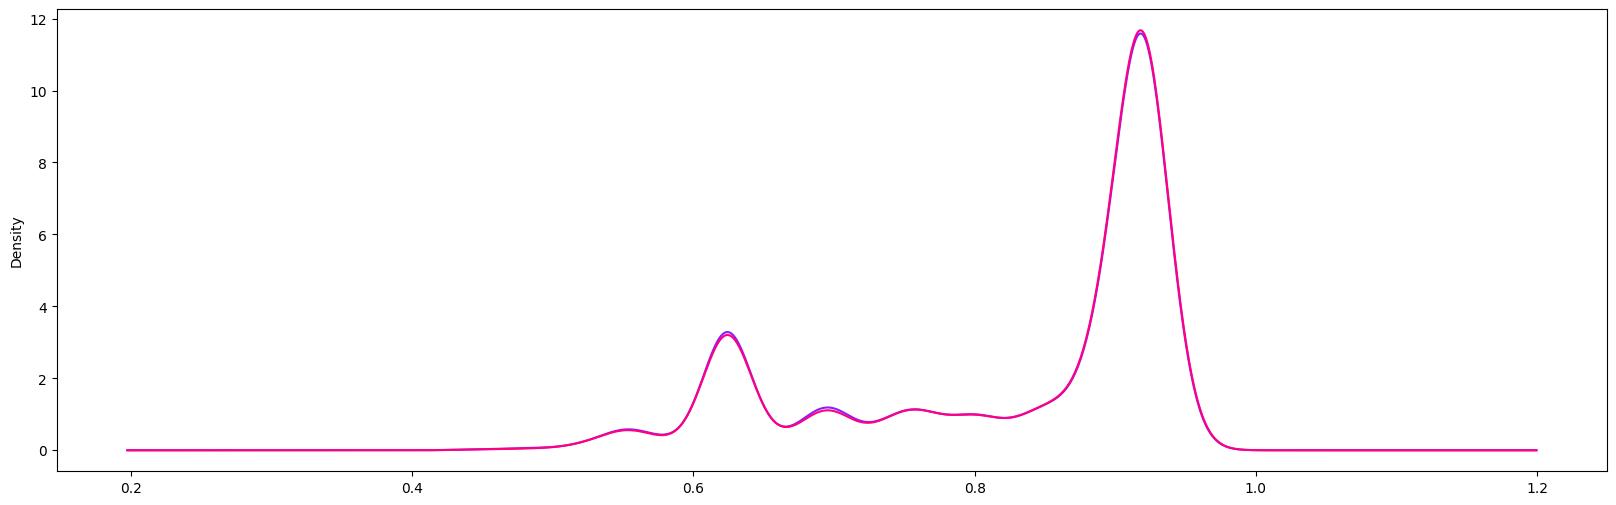

In [36]:
fig = plot.figure(figsize=(20,6))
ax = fig.add_subplot(111)

df['city_development_index'].plot.density(color="#8a1dff")
new_df['city_development_index'].plot.density(color="#ff0080")

<Axes: ylabel='Density'>

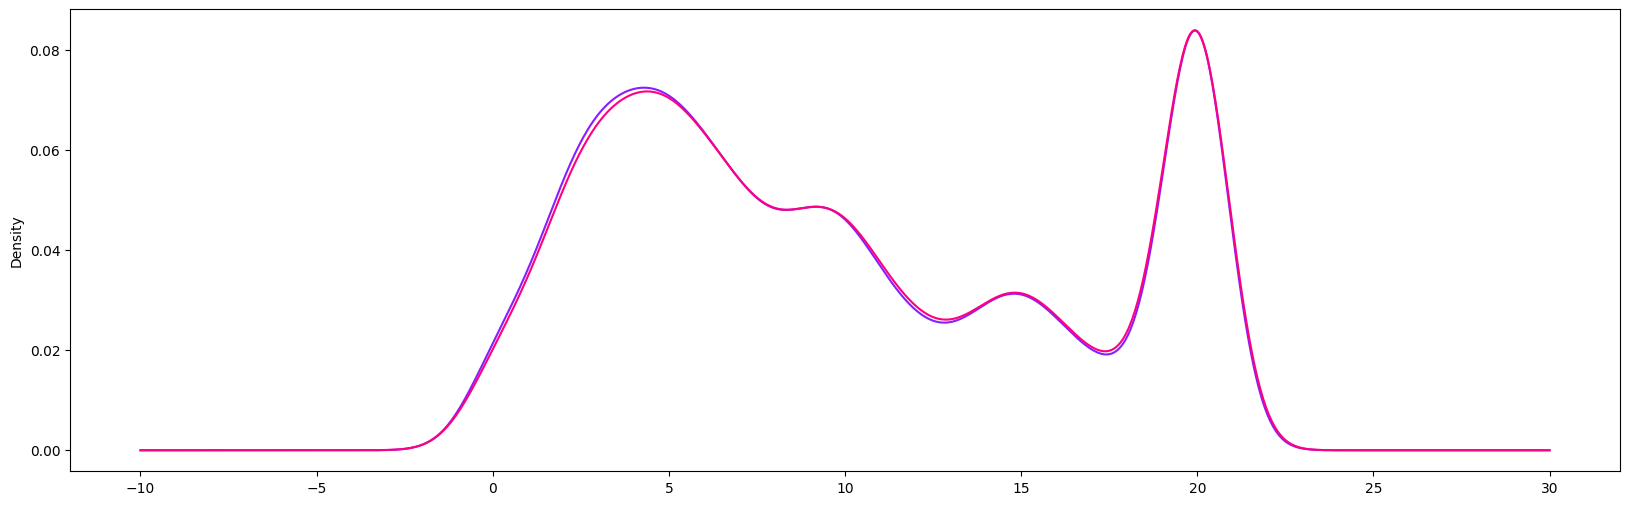

In [37]:
fig = plot.figure(figsize=(20,6))
ax = fig.add_subplot(111)

df['experience'].plot.density(color="#8a1dff")
new_df['experience'].plot.density(color="#ff0080")

#### **Results**
Overlap graphs shows that missing values are randomly distributed

In [39]:
new_df.isnull().sum()

,0
city_development_index,0
enrolled_university,0
education_level,0
experience,0
training_hours,0


In [40]:
df['education_level'].value_counts()

,count
education_level,
Graduate,11598
Masters,4361
High School,2017
Phd,414
Primary School,308


In [42]:
df['enrolled_university'].value_counts()

,count
enrolled_university,
no_enrollment,13817
Full time course,3757
Part time course,1198


In [43]:
temp = pd.concat([
            df['enrolled_university'].value_counts() / len(df),
            new_df['enrolled_university'].value_counts() / len(new_df)
        ],
        axis=1)

temp.columns = ['original', 'cca']

temp

,original,cca
enrolled_university,,
no_enrollment,0.721213,0.735188
Full time course,0.196106,0.200733
Part time course,0.062533,0.064079


In [44]:
temp = pd.concat([
            df['education_level'].value_counts() / len(df),
            new_df['education_level'].value_counts() / len(new_df)
        ],
        axis=1)

temp.columns = ['original', 'cca']

temp

,original,cca
education_level,,
Graduate,0.605387,0.619835
Masters,0.227633,0.234082
High School,0.105282,0.107380
Phd,0.021610,0.022116
Primary School,0.016077,0.016587


#### **Results**
For categorical data, similar ratio values shows missing values are randomly distributed